# seaborn 실습2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


## 통계 기반의 시각화를 제공해주는 Seaborn

`seaborn` 라이브러리가 매력적인 이유는 바로 **통계 차트** 입니다.

이번 실습에서는 `seaborn`의 다양한 통계 차트 중 대표적인 차트 몇 개를 뽑아서 다뤄볼 예정입니다.

더 많은 통계 차트를 경험해보고 싶으신 분은 [공식 도큐먼트](https://seaborn.pydata.org/api.html)에서 확인하실 수 있습니다.

In [5]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


* survived: 생존여부
* pclass: 좌석등급
* sex: 성별
* age: 나이
* sibsp: 형제자매 + 배우자 숫자
* parch: 부모자식 숫자
* fare: 요금
* embarked: 탑승 항구
* class: 좌석등급 (영문)
* who: 사람 구분
* deck: 데크
* embark_town: 탑승 항구 (영문)
* alive: 생존여부 (영문)
* alone: 혼자인지 여부

In [6]:
# tips = sns.load_dataset('tips')
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


* total_bill: 총 합계 요금표
* tip: 팁
* sex: 성별
* smoker: 흡연자 여부
* day: 요일
* time: 식사 시간
* size: 식사 인원

## 1. Countplot

항목별 갯수를 세어주는 `countplot` 입니다.

알아서 해당 column을 구성하고 있는 value들을 구분하여 보여줍니다.

[countplot 공식 도큐먼트](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [8]:
# 배경을 darkgrid 로 설정
sns.set(style='darkgrid')

### 1-1 세로로 그리기

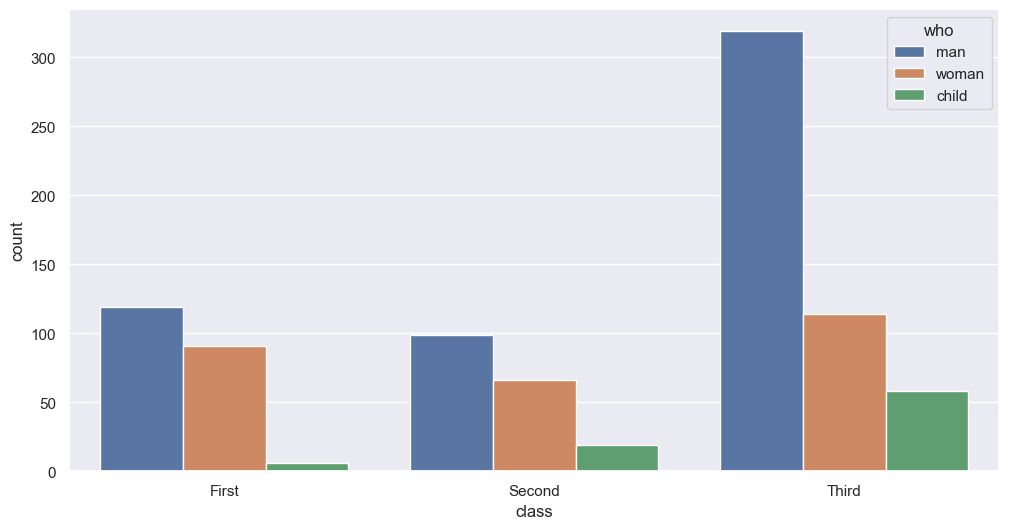

In [9]:
sns.countplot(x="class", hue="who", data=titanic)
plt.show()

### 1-2. 가로로 그리기

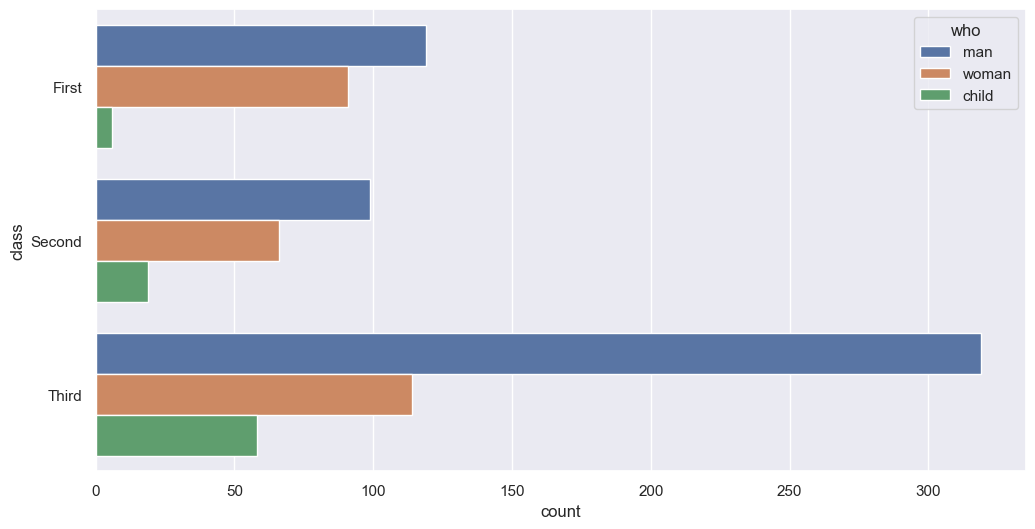

In [10]:
sns.countplot(y="class", hue="who", data=titanic)
plt.show()

### 1-3. 색상 팔레트 설정

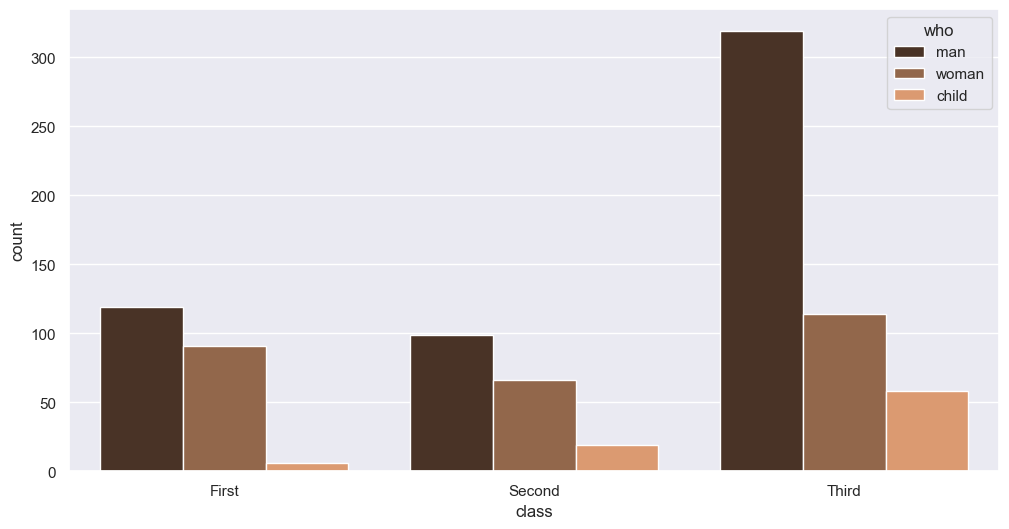

In [11]:
sns.countplot(x="class", hue="who", palette='copper', data=titanic)
plt.show()

## 2. distplot

matplotlib의 `hist` 그래프와 `kdeplot`을 통합한 그래프 입니다.

**분포**와 **밀도**를 확인할 수 있음

[distplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot)

### distplot 전달인자
- 데이터의 분포를 시각화하여 데이터의 특성과 패턴을 파악하는 데 유용함
- rug : 데이터의 각 관측치를 축 위에 작은 선분으로 표시, 기본값 False
- hist : 히스토그램을 표시할지 여부를 결정, 기본값 True
- kde : 커널 밀도 추정(KDE)을 사용하여 곡선을 플롯에 추가, 기본값 True
- bins : 히스토그램의 빈(bin) 개수를 설정, 기본값은 'auto'

In [12]:
# 샘플데이터 생성
x = np.random.randn(100)
x

array([-0.41476525,  0.29848778,  0.5223456 ,  0.13313751, -1.52671941,
        0.3903071 , -0.52807   , -1.04462149, -0.29247762, -0.29229996,
        0.33993208,  1.27420361, -1.16190919,  0.48490437, -1.1586813 ,
       -0.51592014, -0.93862328,  0.10173043, -1.34203601, -0.59430923,
        1.47762631,  0.20643756, -0.70548336, -0.42040911, -1.3876615 ,
        0.99961332, -1.36819935,  1.08838585, -1.44259943, -1.12167084,
       -0.50464113, -0.24176165, -0.4199357 , -0.78095409,  1.25982   ,
       -1.33890331, -0.85189116,  0.63457445, -0.68161305,  0.73542939,
        0.9994843 ,  1.07165774, -0.35567127,  1.44110486,  1.9402865 ,
       -0.17557129,  0.53417777,  0.24989326,  2.45382197,  1.1608206 ,
       -0.16435195,  1.13996293, -0.99648108, -1.04802199, -0.45283282,
        0.3527983 , -1.43502459, -0.17977853,  0.80345183, -0.02075639,
       -0.60159468,  0.44051885, -0.78577096, -1.10563575, -0.12320036,
       -0.03032025, -1.0131301 , -0.5881858 , -0.97786517, -2.22

### 2-1. 기본 distplot  

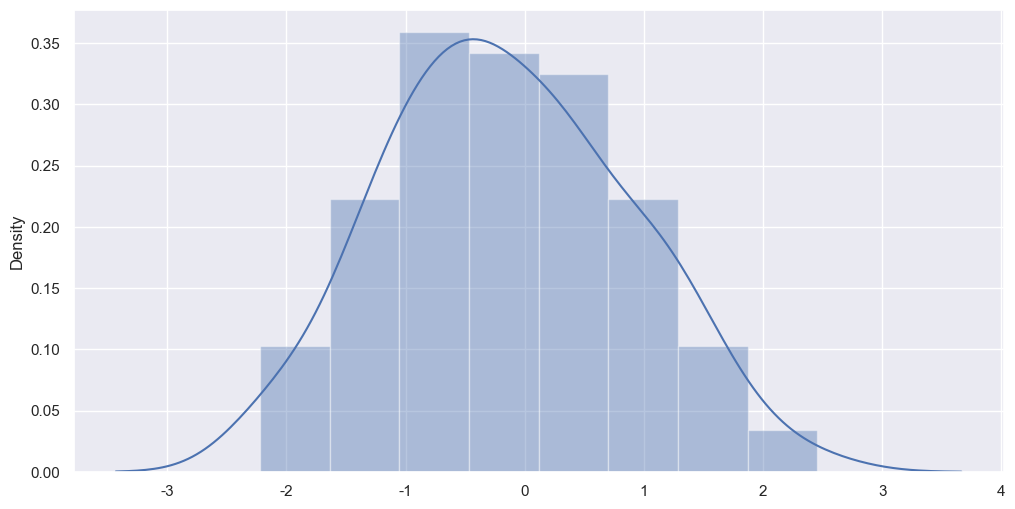

In [13]:
sns.distplot(x)
plt.show()

### 2-2. 데이터가 Series 일 경우

In [14]:
x = pd.Series(x, name="x variable")
x

0    -0.414765
1     0.298488
2     0.522346
3     0.133138
4    -1.526719
        ...   
95   -1.442329
96    1.083830
97    0.315803
98   -2.121416
99    0.285157
Name: x variable, Length: 100, dtype: float64

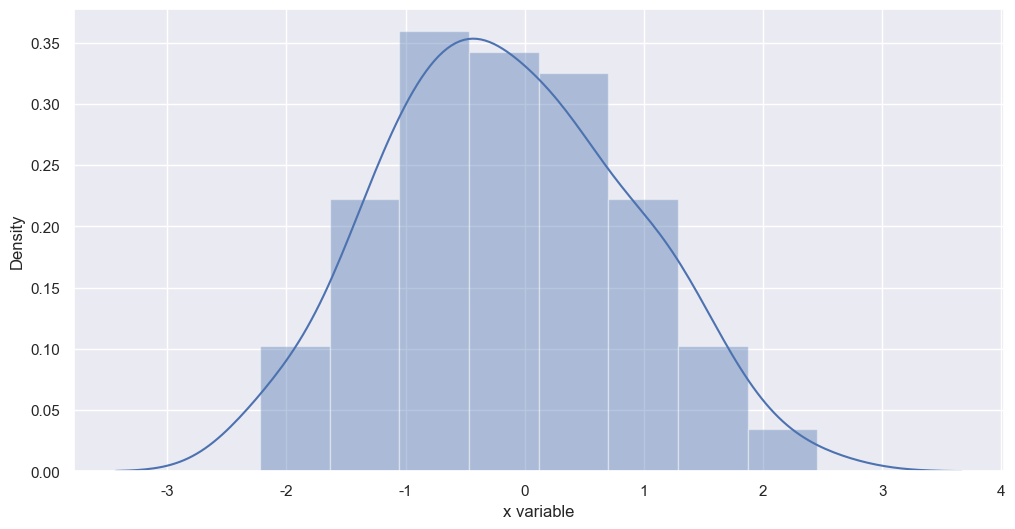

In [15]:
sns.distplot(x)
plt.show()

### 2-3 rugplot
rug : 데이터의 각 관측치를 축 위헤 작은 선분으로 표시, 기본 False

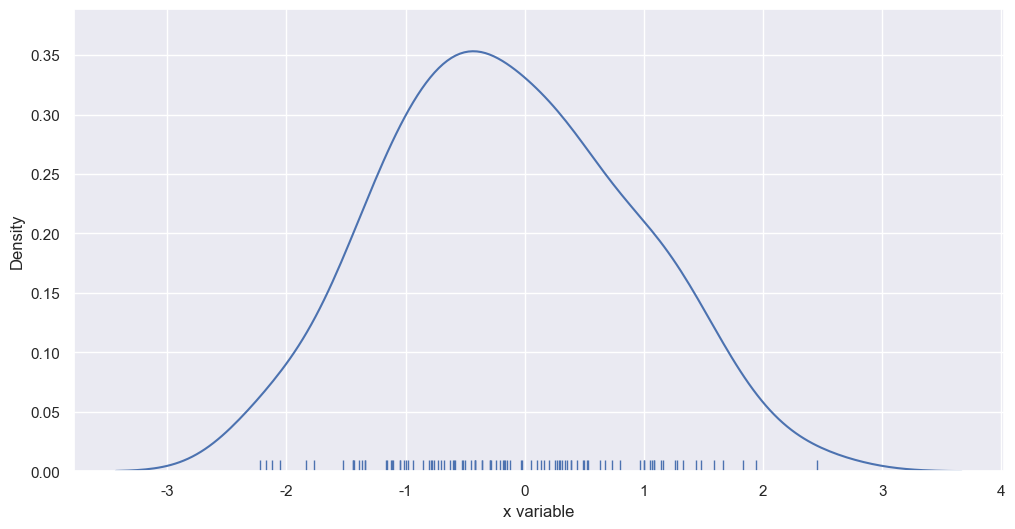

In [16]:
sns.distplot(x, rug=True, hist=False, kde=True)
plt.show()

### 2-4. kde (kernel density)

`kde`는 histogram보다 **부드러운 형태의 분포 곡선**을 보여주는 방법

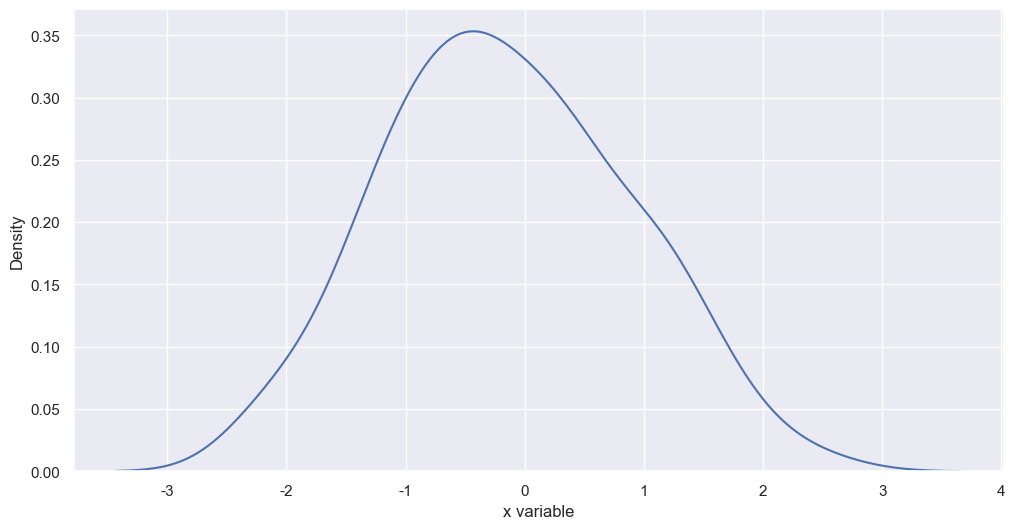

In [17]:
sns.distplot(x, rug=False, hist=False, kde=True)
plt.show()

### 2-5. 가로로 표현하기

<Axes: xlabel='Density', ylabel='x variable'>

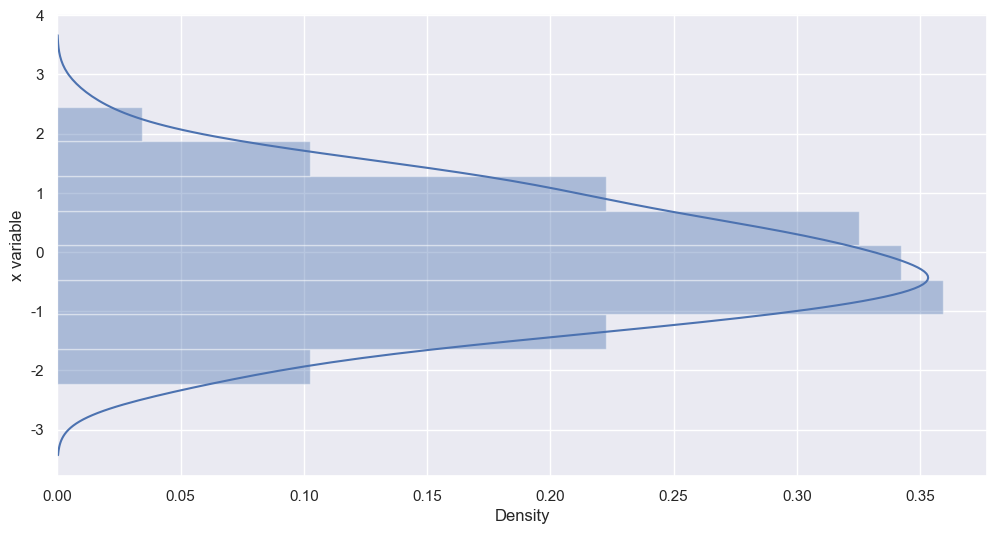

In [22]:
 sns.distplot(x, vertical=True)

### 2-6. 컬러 바꾸기

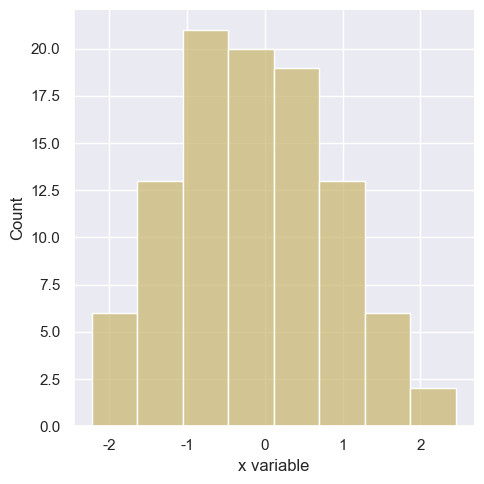

In [20]:
sns.displot(x, color="y")
plt.show()

색상으로 표현할 수 있는 다양한 정보를 **일정한 이미지위에 열분포 형태의 비쥬얼한 그래픽**으로
출력하는 것이 특징이다

## 3. pairplot

[pairplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)

- pairplot은 그리도(grid) 형태로 각 **집합의 조합에 대해 히스토그램과 분포도**를 그림
- 변수들 간의 산점도와 히스토그램을 표시하여 변수들 간의 상관관계와 분포를 시각화하는 데 사용함

- 또한, 숫자형 column에 대해서만 그려줌

In [23]:
file_path = "datas/sns_tips.csv"
tips = pd.read_csv(file_path)
tips.head()

,total_bill,tip,gender,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 3-1. 기본 pairplot 그리기
- 다변량 데이터셋에서 변수들 간의 관계를 탐색하고 시각화하기 위해 활용
- 중소 규모의 다변량 데이터셋에서 변수들 간의 상관관계와 분포를 빠르게 시각화하고 파악하는 데 유용

- 주로 다음과 같은 상황에서 많이 사용
    - 변수들 간의 상관관계 파악 : 데이터셋의 모든 변수 쌍에 대한 산점도를 생성하므로, 변수들 간의 선형 또는 비선형 상관관계를 파악하는 데 도움이 됨
    - 변수들의 분포 비교 : 변수들의 분포 형태, 이상치 여부, 분산 등을 비교하고 분포의 차이를 시각적으로 파악
    - 데이터셋 탐색:  데이터셋을 처음 탐색할 때 유용, 데이터셋의 변수들 간의 관계를 한눈에 파악할 수 있으며, 변수들의 분포를 확인하여 데이터셋의 특징과 패턴을 이해하는 데 도움

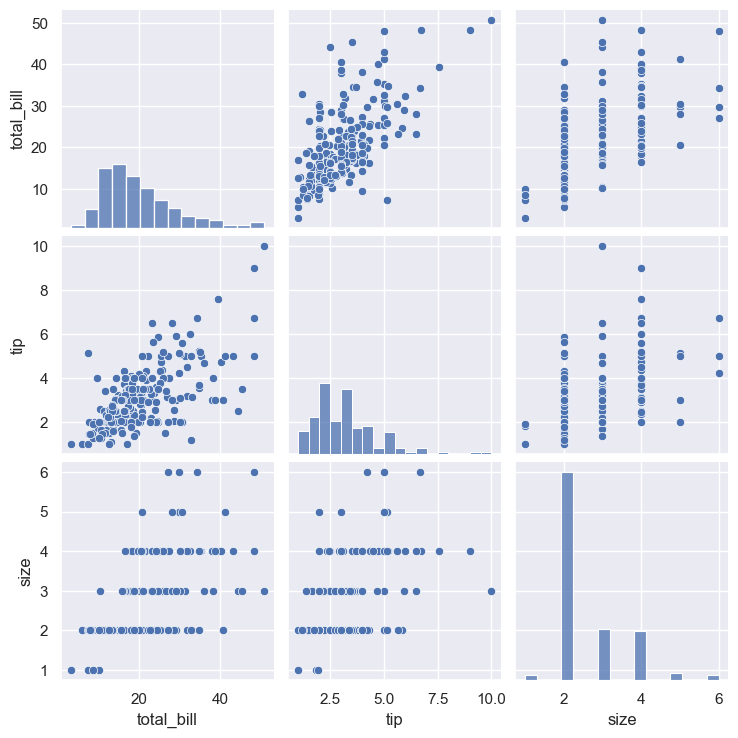

In [24]:
sns.pairplot(tips)
plt.show()

### 3-2. hue 옵션으로 특성 구분

통계
위도
천도 : 꼭대기 값

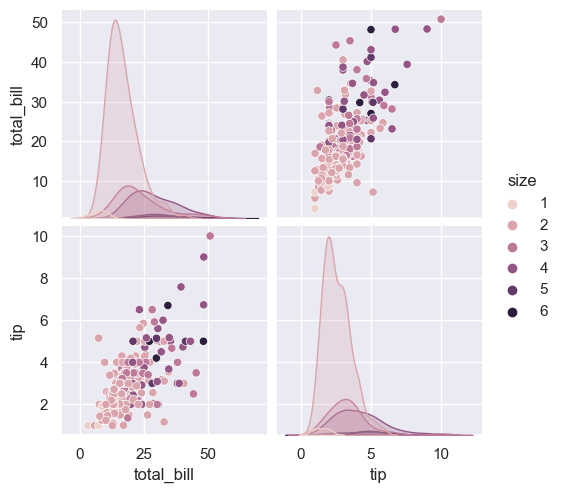

In [25]:
sns.pairplot(tips, hue='size')
plt.show()

### 3-3. 컬러 팔레트 적용

예) sns.pairplot(tips, hue='size', palette="rainbow")
palette="rainbow" 에서 rainbow 대신 사용가능한 값

- deep: 강렬한 색조의 색상 팔레트로, 주로 분류 작업에 사용
- muted: 조화로운 색상 팔레트로, 시각화를 부드럽게 만들어줌
- bright: 밝은 색상 팔레트로, 시각적으로 눈에 띄게 만들어줌
- pastel: 연한 색조의 색상 팔레트로, 부드럽고 상쾌한 시각화를 만들어줌
- dark: 어두운 색상 팔레트로, 대비를 강조하여 시각화를 선명하게 만들어줌
- colorblind: 색각(색상 감각) 이상을 고려한 색상 팔레트로, 구분하기 쉬운 색조를 사용하여 시각적 접근성을 향상시킴


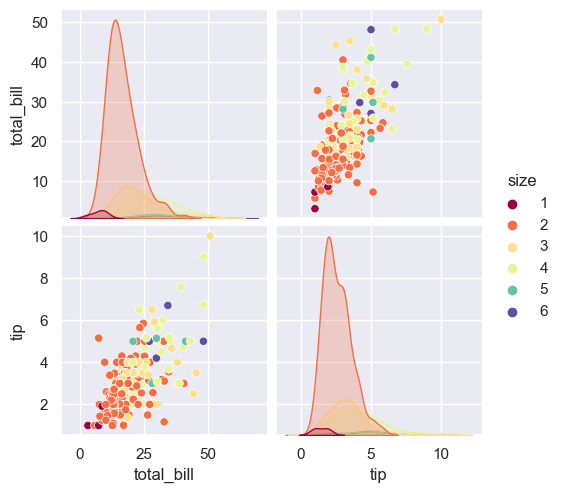

In [28]:
sns.pairplot(tips, hue='size', palette="Spectral")
plt.show()

### 3-4. 그리드의 높이
- height, 기본값 6
- 그리도 표현된 차트 1개의 높이 설정, 숫자가 클수록, 그리드의 높이가 커짐


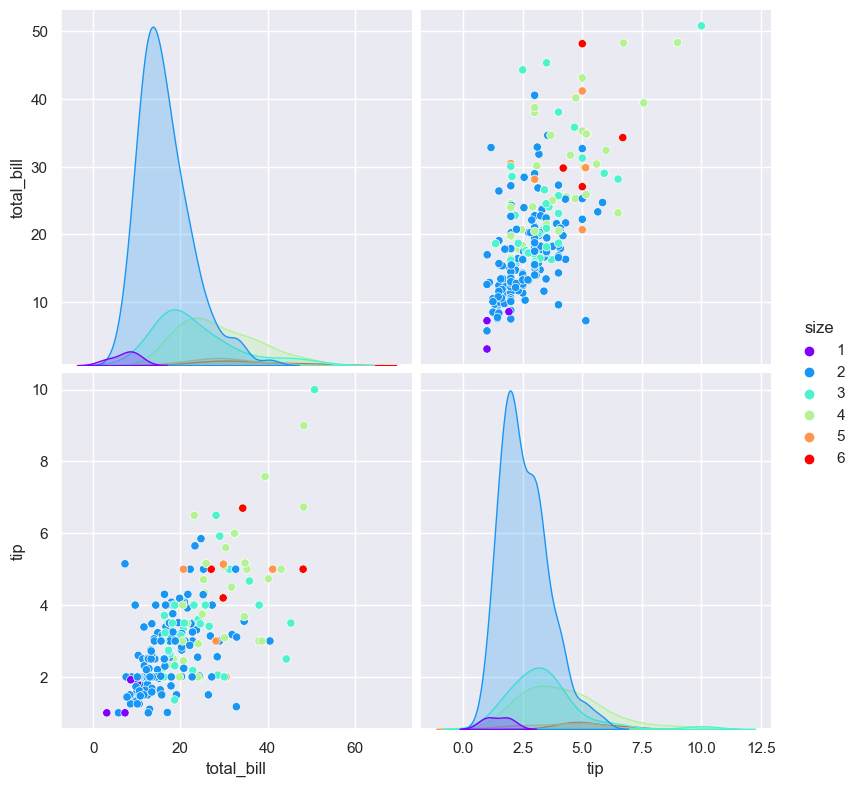

In [35]:
sns.pairplot(tips, hue='size', palette="rainbow", height=4)
plt.show()

## 4. lmplot

`lmplot`은 column 간의 **선형 회귀 모델(linear regression model)을 시각화하는데 용이한 차트**

또한, **outlier**도 같이 짐작해 볼 수 있음

[lmplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

### 4-1. 기본 lmplot

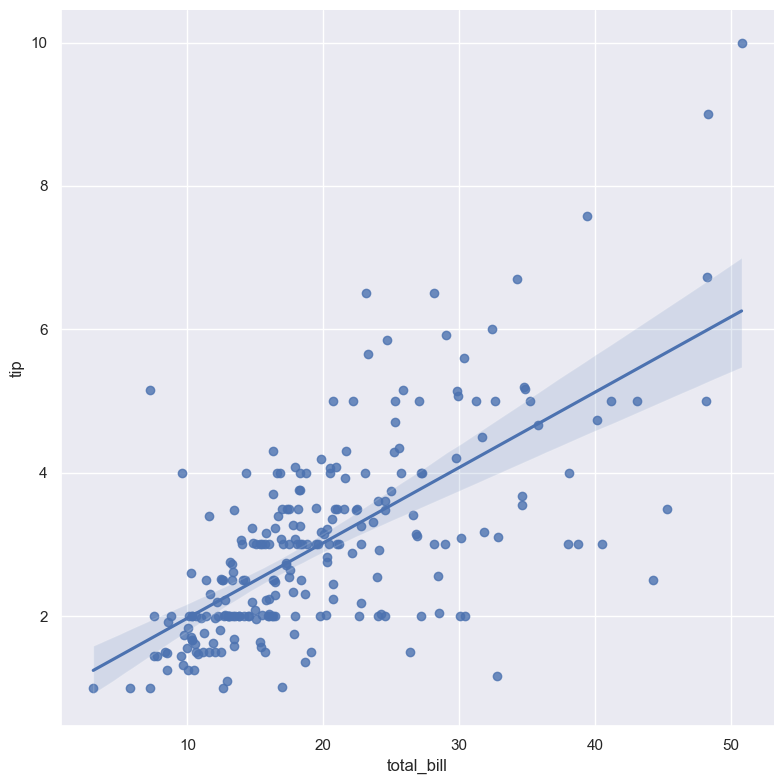

In [30]:
sns.lmplot(data=tips, x="total_bill", y="tip", height=8)
plt.show()

### 4-2. hue 옵션으로 다중 선형관계 그리기

아래의 그래프를 통하여 비흡연자가, 흡연자 대비 좀 더 **가파른 선형관계**를 가지는 것을 볼 수 있습니다.

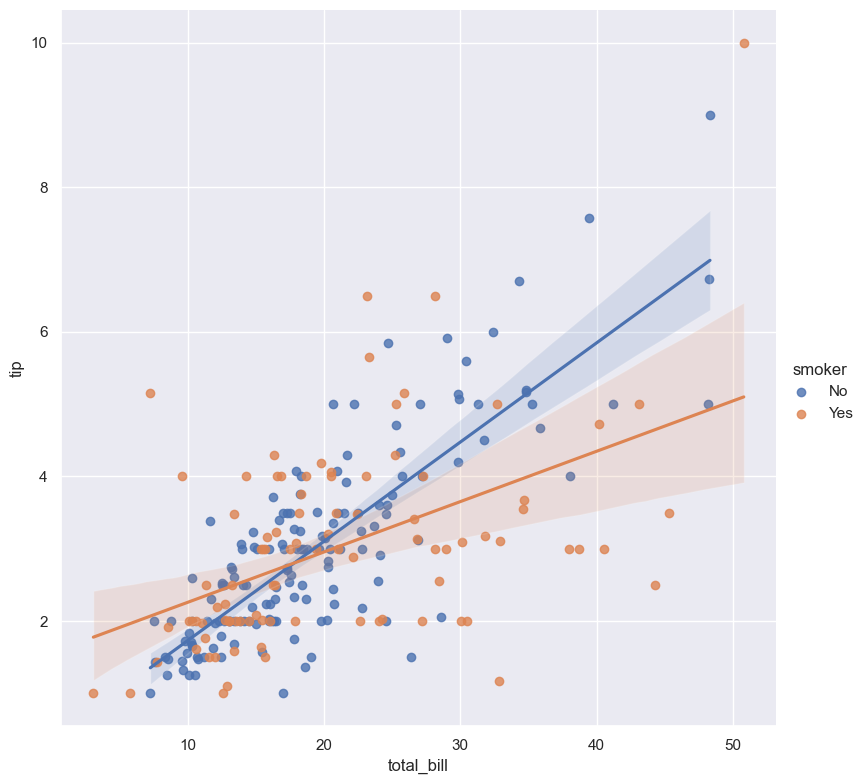

In [31]:
sns.lmplot(data=tips, x="total_bill", y="tip", hue="smoker", height=8)
plt.show()

### 4-3. col 옵션을 추가하여 그래프를 별도로 그려볼 수 있음

또한, `col_wrap`으로 한 줄에 표기할 column의 갯수를 명시할 수 있음

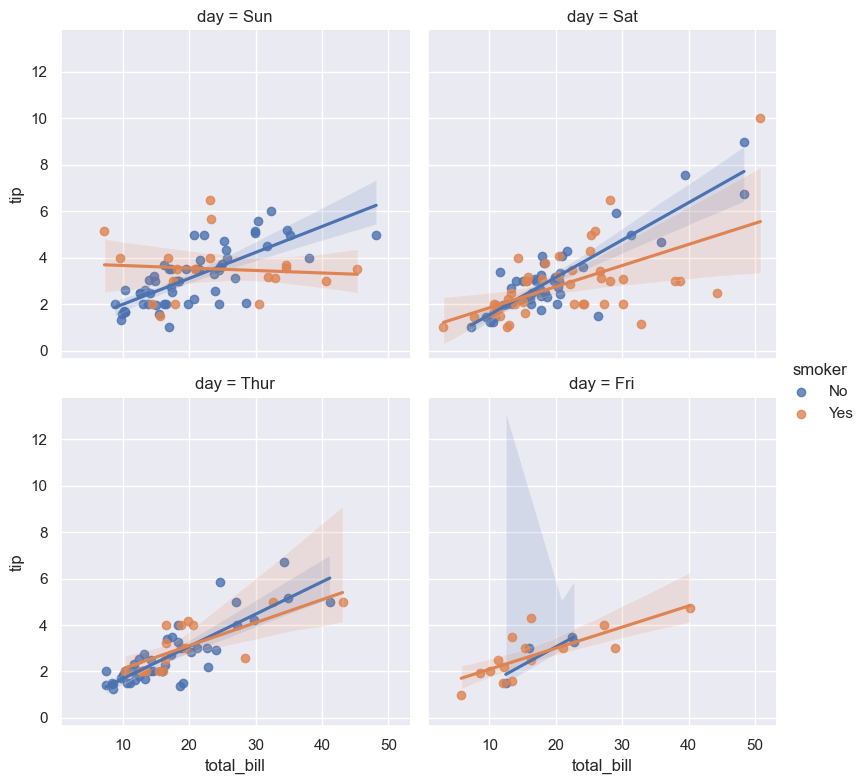

In [32]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='day', col_wrap=2, height=4)
plt.show()

## 5. relplot

두 column간 상관관계를 보지만 `lmplot`처럼 선형관계를 따로 그려주지는 않습니다.

[relplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot)

### 5-1. 기본 relplot

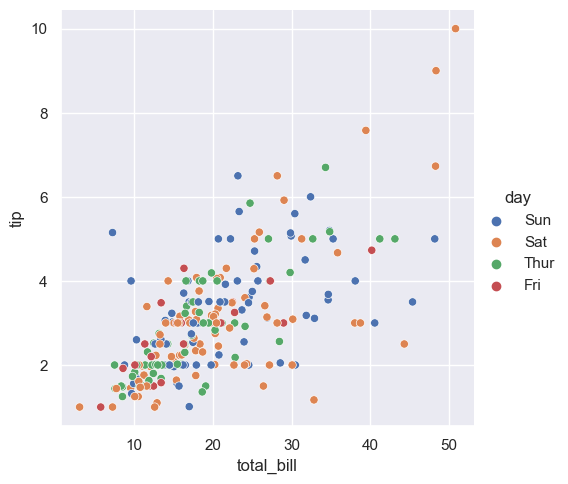

In [36]:
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)
plt.show()

### 5-2. col 옵션으로 그래프 분할

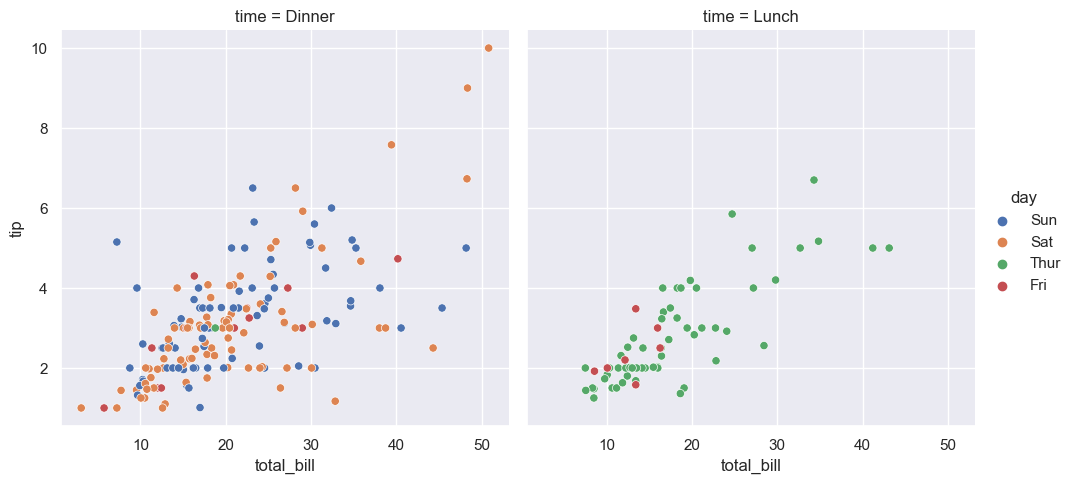

In [39]:
sns.relplot(x="total_bill", y="tip", hue="day", col="time", data=tips)
plt.show()

### 5-3. row와 column에 표기할 데이터 column 선택

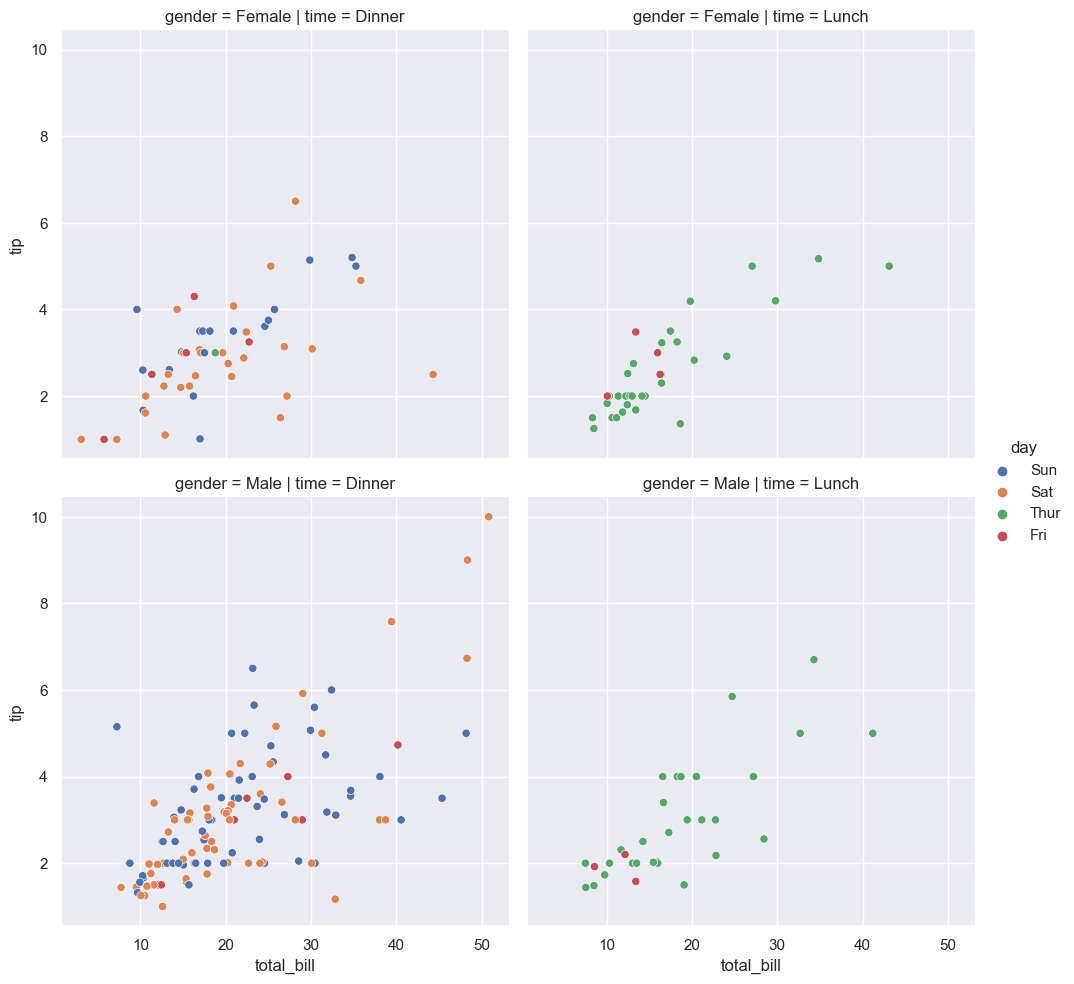

In [45]:
sns.relplot(x="total_bill", y="tip", hue="day", row="gender", col="time", data=tips)
plt.show()

## 6. jointplot

scatter(산점도)와 histogram(분포)을 동시에 그려줌

**숫자형 데이터만 표현 가능함**

[jointplot 도큐먼트](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)

### 6-1. 기본 jointplot 그리기

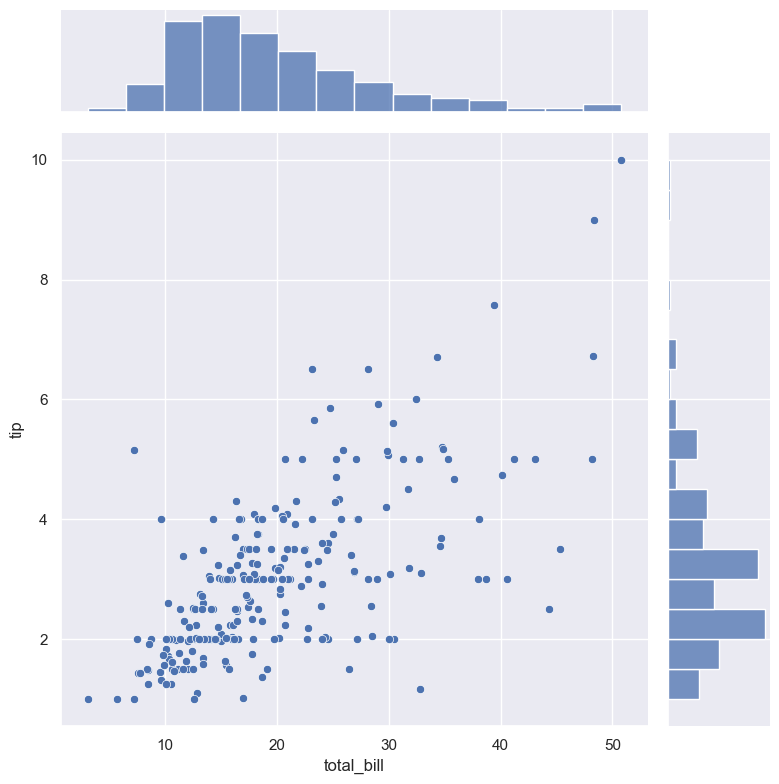

In [46]:
sns.jointplot(data=tips, x="total_bill", y="tip", height=8)
plt.show()

### 6-2. 선형관계를 표현하는 regression 라인 그리기

옵션에 **kind='reg'**을 추가해 주기

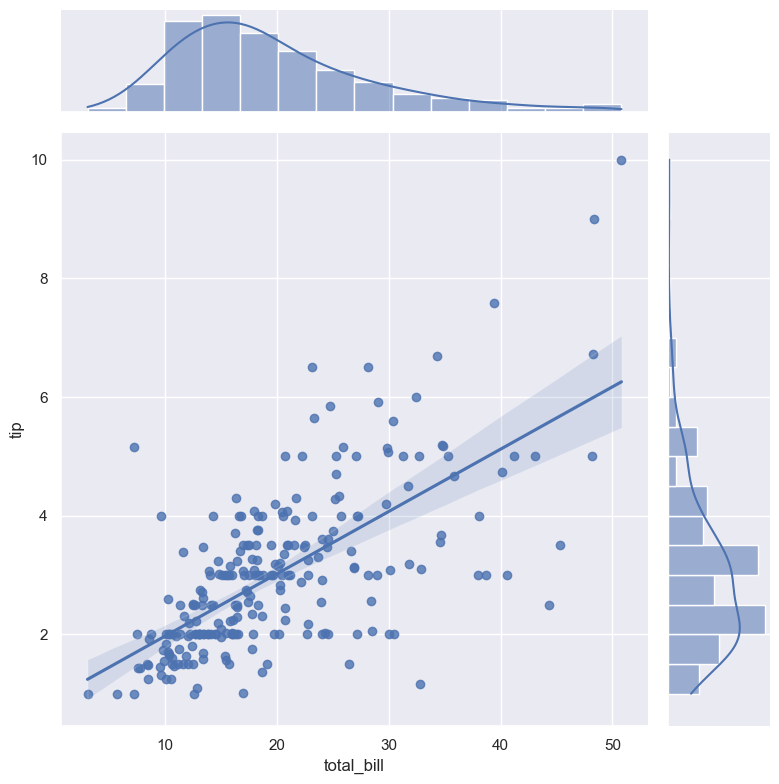

In [47]:
sns.jointplot(data=tips, x="total_bill", y="tip", height=8, kind="reg")
plt.show()

### 6-3. hex 밀도 보기

**kind='hex'** 옵션을 통해 hex 모양의 밀도를 확인할 수 있음.
- 변수의 값들을 2D 육각형 그래프로 표현
- 각 육각형의 색상은 해당 영역에 속한 데이터 포인트의 빈도수를 나타냄.
- 빈도가 높은 영역은 더 진한 색상으로 표현, 변수 간의 밀집도와 분포를 시각화하며
- 두 변수 간의 상관 관계를 대략적으로 확인할 수 있


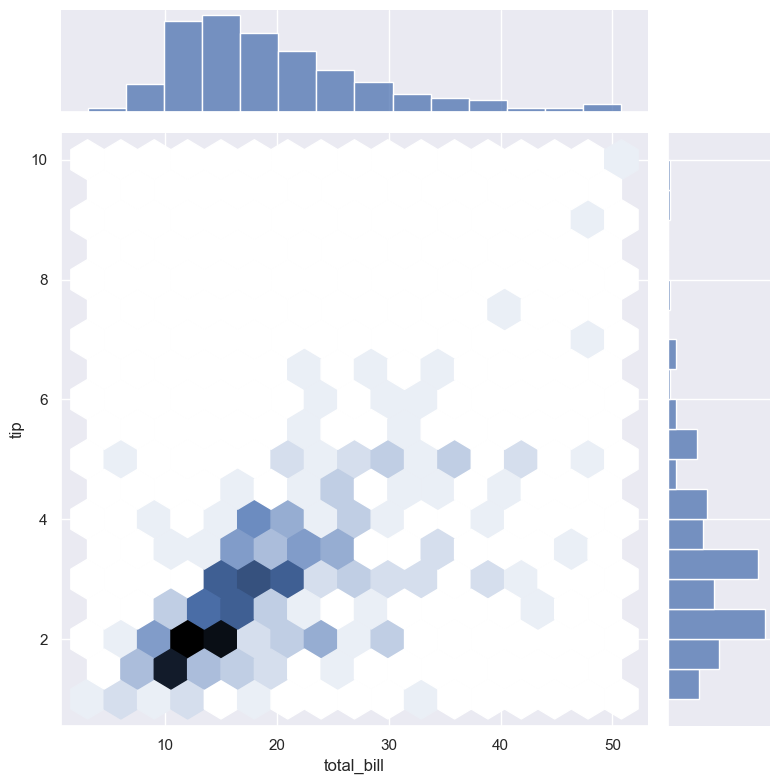

In [48]:
sns.jointplot(data=tips, x="total_bill", y="tip", height=8, kind="hex")
plt.show()

### 6-4. 등고선 모양으로 밀집도 확인하기

**kind='kde'** 옵션으로 데이터의 밀집도를 보다 부드러운 선으로 확인할 수 있음

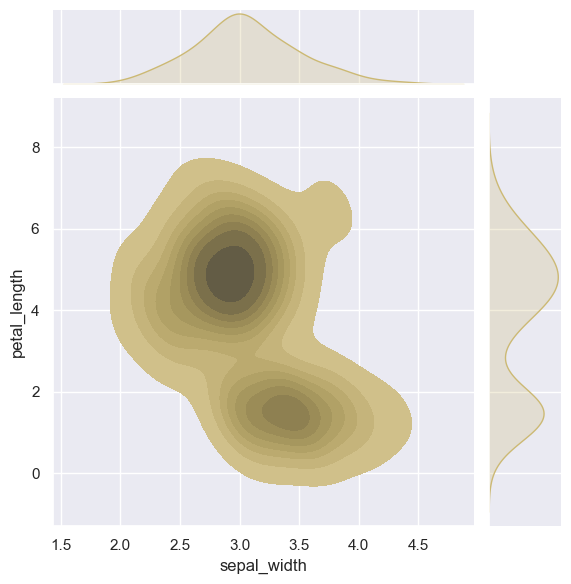

In [62]:
iris = sns.load_dataset('iris')
# sns.jointplot(data=iris, x="sepal_width", y="petal_length", height=6, kind="kde", color="g")
sns.jointplot(data=iris, x="sepal_width", y="petal_length", height=6, kind="kde", color="y", fill=True)
plt.show()